In [12]:
import openml 

In [13]:
import openml

# Define the task ID
task_id = 233094  # Change this to the task ID you're interested in

# Step 1: Get the task object using its ID
task = openml.tasks.get_task(task_id)

# Step 2: Access the original data splits from the task object
train_indices, test_indices = task.get_train_test_split_indices()

dataset_id = task.dataset_id

# Step 3: Use the indices to obtain the original split from the dataset
dataset = task.get_dataset()
X, y, _,_= dataset.get_data(target=task.target_name)

print(dataset_id)

INFO:openml.datasets.dataset:pickle load data vehicle
54
54


In [14]:
type(y[:len(train_indices)])

pandas.core.series.Series

AS we can see in the below plot, the split is almost a balanced split between classes.

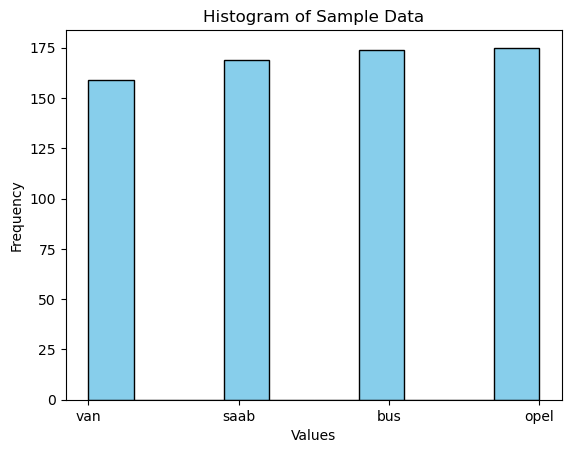

In [15]:
import matplotlib.pyplot as plt

data = y[:len(train_indices)]
plt.hist(data, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')

# Show the plot
plt.show()

___

In [16]:
import sys
sys.path.append('/home/diego/Git/thesis-tabtrans')
from utils import training, callback, evaluating, attention, data


In [17]:
df = data.read_dataset_by_id(54)

INFO:openml.datasets.dataset:pickle write vehicle


In [18]:
y = df["outputs"].codes

In [19]:
y

array([3, 3, 1, 3, 2, 2, 2, 3, 3, 1, 3, 1, 2, 3, 2, 0, 3, 2, 1, 0, 2, 3,
       2, 2, 1, 3, 1, 1, 2, 1, 3, 1, 0, 0, 0, 3, 2, 3, 1, 2, 0, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 1, 0, 2, 2, 3, 1, 3, 0, 3, 0, 0, 3, 2, 2, 0,
       2, 0, 3, 2, 0, 0, 0, 0, 3, 0, 1, 1, 2, 2, 2, 2, 3, 0, 2, 2, 3, 3,
       2, 0, 1, 0, 1, 3, 2, 0, 1, 2, 0, 2, 2, 3, 3, 3, 2, 1, 0, 0, 2, 2,
       3, 3, 0, 0, 3, 3, 0, 1, 2, 2, 1, 3, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1,
       1, 3, 0, 3, 3, 3, 1, 3, 1, 2, 0, 2, 0, 0, 3, 2, 1, 3, 1, 2, 0, 1,
       3, 2, 0, 3, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 2, 3, 2,
       0, 2, 2, 3, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 3, 1, 2, 1, 2, 1, 2,
       2, 2, 3, 1, 0, 0, 3, 3, 0, 2, 2, 0, 0, 3, 2, 2, 0, 0, 1, 0, 2, 3,
       0, 3, 2, 2, 1, 3, 1, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2, 2, 0, 2, 0, 0,
       2, 1, 3, 3, 2, 1, 0, 1, 3, 0, 3, 2, 3, 1, 1, 0, 1, 0, 1, 1, 3, 3,
       1, 2, 2, 1, 3, 3, 2, 1, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 3, 1,
       2, 3, 0, 1, 3, 3, 2, 3, 2, 2, 2, 1, 1, 2, 1,

In [20]:
task_id = 233094
X_train, X_test, y_train, y_test, _, _, _, _ = data.import_data(task_id, "task")

INFO:openml.datasets.dataset:pickle write vehicle


In [21]:
len(X_test) == len(y_test)

True

In [22]:
df_id = 54
X, y, _, _, _, _ = data.import_data(df_id, "ds_id")

INFO:openml.datasets.dataset:pickle write vehicle


In [25]:
import numpy as np

X_concatenated = np.concatenate((X_train, X_test))

In [28]:
np.array_equal(X_concatenated, X)

True